In [14]:
## Expand JVM memory
options(java.parameters = "-Xmx8000m")

## Internal helpers
source("../R/helpers.R")

## Climate4R
library(loadeR)
library(visualizeR)



## Check model availability

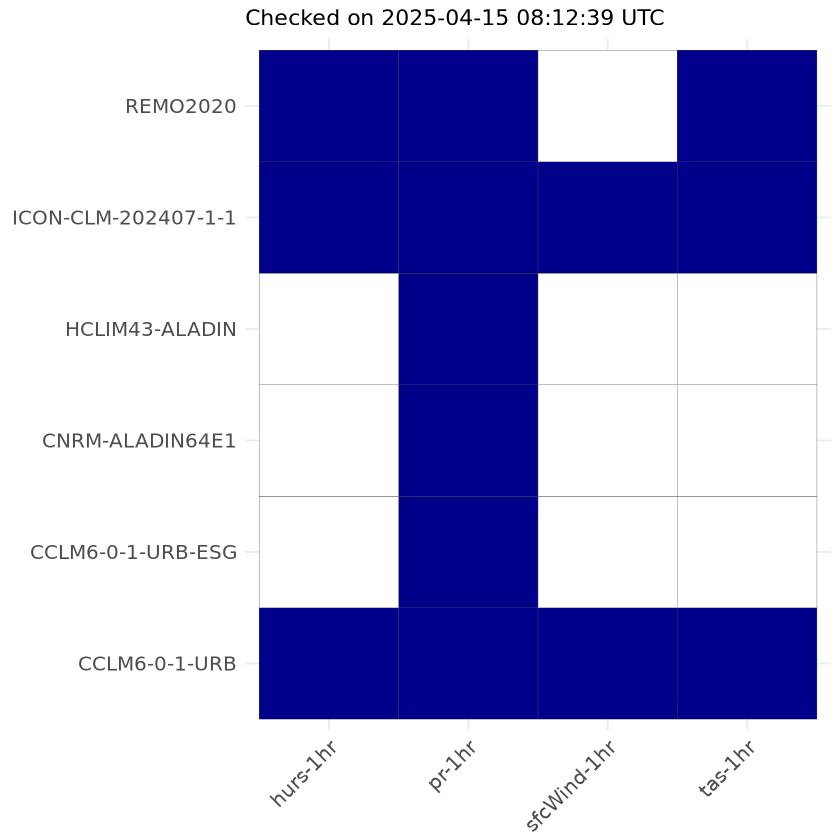

In [15]:
models <- availableModels(do.plot = TRUE)

In [3]:
data.dir <- "/mnt//CORDEX_CMIP6_tmp//sim_data//CORDEX-CMIP6//DD//EUR-12//"

In [4]:
i=1

#for (i in 1:length(models)) {
    model <- models[i]

In [5]:
model

[1] "CCLM6-0-1-URB"

In [6]:
lf <- list.files(data.dir,
                 recursive = TRUE,
                 pattern = paste0("evaluation.*", model, "_.*1hr"),
                 full.names = TRUE) %>% grep("/pr_.*nc$", ., value = TRUE) 

In [7]:
#tp.list <- lapply(1:length(lf), function(j) {
tp.list <- lapply(1:2, function(j) {
    ds <- lf[j]
    message("[", Sys.time(), "] Reading data file ", j, " out of ", length(lf))
    suppressMessages(
        tp <- loadGridData(ds, var = "pr", dictionary = "dictionary.dic", season = 5:10)
    )
    message("Performing accumulation 12-12")
    tpa <- accum_pr(tp) 
})

[2025-04-13 13:22:47.331366] Reading data file 1 out of 42

Performing accumulation 12-12

[2025-04-13 13:25:47.586283] Reading data file 2 out of 42

Performing accumulation 12-12



In [8]:
print(object.size(tp.list), units = "Mb")

479.1 Mb


In [9]:
test <- do.call("bindGrid", c(tp.list, dimension = "time"))

In [10]:
str(test)


List of 4
 $ Variable:List of 2
  ..$ varName: chr "pr"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi TRUE
  ..- attr(*, "description")= chr "Precipitation"
  ..- attr(*, "units")= chr "mm"
  ..- attr(*, "longname")= chr "total precipitation amount"
  ..- attr(*, "daily_agg_cellfun")= chr "sum"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "12:00 UTC"
 $ Data    : num [1:366, 1:406, 1:418] 0 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 4
  ..$ x  : num [1:418] -28 -27.9 -27.8 -27.7 -27.6 ...
  ..$ y  : num [1:406] -23 -22.9 -22.8 -22.7 -22.6 ...
  ..$ lon: num [1:406, 1:418] -9.9 -9.95 -10 -10.04 -10.09 ...
  ..$ lat: num [1:406, 1:418] 22.4 22.5 22.6 22.7 22.8 ...
  ..- attr(*, "projection")= chr "RotatedPole"
  ..- attr(*, "grid_mapping_name")= chr "rotated_latitude_longitude"
  ..- attr(*, "grid_north_pole_latitude")= chr "39.25"
  ..- attr(*, "grid_north_pole_longitude")= c